<a href="https://colab.research.google.com/github/DavideLupo17/Python_TPSI/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import joblib

# Creazione del modello
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Carica il dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizza e ridimensiona le immagini
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Codifica one-hot per le etichette
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Addestra il modello
model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.10)

# Montaggio di Google Drive
drive.mount('/content/drive')

# Salvataggio del modello su Google Drive
model_path = '/content/drive/MyDrive/model.joblib'
joblib.dump(model, model_path)


Epoch 1/5
844/844 [==============================] - 50s 57ms/step - loss: 0.2035 - accuracy: 0.9382 - val_loss: 0.0751 - val_accuracy: 0.9755
Epoch 2/5
844/844 [==============================] - 49s 58ms/step - loss: 0.0554 - accuracy: 0.9831 - val_loss: 0.0558 - val_accuracy: 0.9838
Epoch 3/5
844/844 [==============================] - 49s 59ms/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.0373 - val_accuracy: 0.9898
Epoch 4/5
844/844 [==============================] - 51s 61ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0403 - val_accuracy: 0.9888
Epoch 5/5
844/844 [==============================] - 48s 57ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0440 - val_accuracy: 0.9895
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/model.joblib']

In [72]:
from google.colab import drive
from tensorflow.keras.models import load_model
import joblib

# Monta Google Drive
drive.mount('/content/drive')

# Percorso del modello su Google Drive
model_path = '/content/drive/MyDrive/model.joblib'

# Carica il modello
model = joblib.load(model_path)

# Ora puoi utilizzare il modello per fare previsioni, ad esempio:
# prediction = model.predict(input_data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Salvataggio del modello
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/mnist_model.h5'
model.save(model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np
import io


# Carica l'immagine dal tuo dispositivo
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = Image.open(io.BytesIO(uploaded[image_path]))

# Preprocessa l'immagine
img = img.convert('L')  # Converti l'immagine a scala di grigi se non lo è già
img = img.resize((28, 28))
img_array = np.array(img)
img_array = img_array.reshape((1, 28, 28, 1)).astype('float32') / 255

# Fai previsioni sull'immagine
prediction = model.predict(img_array)

# Interpreta le previsioni
predicted_class = np.argmax(prediction)

# Stampa la classe predetta
print(f"Classe predetta: {predicted_class}")


# Chiedi all'utente di correggere manualmente la classe
corrected_class = int(input('Enter corrected class: '))

# Correggi l'etichetta nei dati di test
corrected_label = np.zeros_like(y_test[0])
corrected_label[corrected_class] = 1
y_test[0] = corrected_label

# riaddestra set
model.fit(x_test, y_test, epochs=1, batch_size=64)

# Fai previsioni sull'immagine corretta
prediction = model.predict(img_array)


# Salvataggio del modello
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/mnist_model.h5'
model.save(model_path)


Saving 5D9DFF35-1729-4DAA-A653-79907774ADB9.jpeg to 5D9DFF35-1729-4DAA-A653-79907774ADB9.jpeg
1/1 [==============================] - 0s 20ms/step
Classe predetta: 4


KeyboardInterrupt: ignored

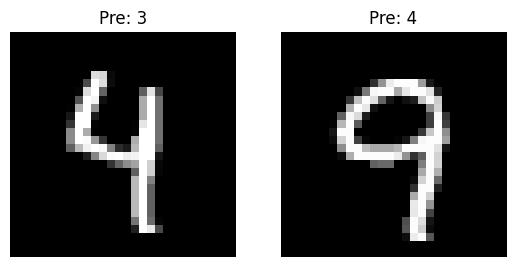

Enter corrected class for image 1: 4
Enter corrected class for image 2: 9
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


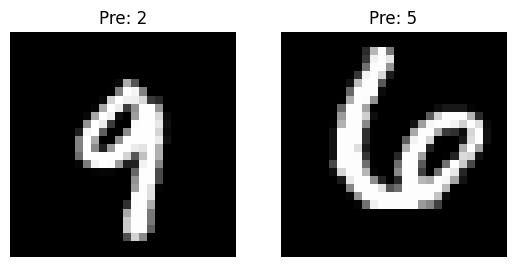

Enter corrected class for image 1: 9
Enter corrected class for image 2: 6
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


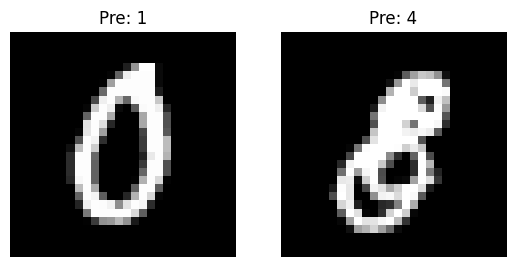

Enter corrected class for image 1: 0
Enter corrected class for image 2: 8
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

Corrected labels:

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Numero massimo di iterazioni manuali
max_iterations = 3

for iteration in range(max_iterations):
    # Prendi un sottoinsieme di immagini dal set di test
    sample_indices = np.random.choice(len(x_test), size=2, replace=False)
    sample_images = x_test[sample_indices]

    # Fai previsioni sulle immagini di esempio
    predicted_classes = np.random.randint(0, 10, size=len(sample_images))

    # Mostra le immagini e le previsioni
    fig, axs = plt.subplots(1, len(sample_images))
    for i, (img, pred) in enumerate(zip(sample_images, predicted_classes)):
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f"Pre: {pred}")
        axs[i].axis('off')
    plt.show()

    # Etichettatura manuale simulata
    corrected_classes = np.array([int(input(f"Enter corrected class for image {i + 1}: ")) for i in range(len(sample_images))])
    corrected_labels = to_categorical(corrected_classes, num_classes=10)
    y_test[sample_indices] = corrected_labels
    print(y_test[sample_indices])


# Stampa il set di etichette corrette
print("\nCorrected labels:\n")
print(y_test)

# Salvataggio del modello
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/mnist_model.h5'
model.save(model_path)